### Aaditya Vyas - Sprint 12 Project - Used Car Sales Analysis

* The dealership "Rusty Bargain" desires to develop a new application to attract new customers
* The goal is to create an application which can quickly find out the market value of a car which customers wish to sell
* The application will require some background analysis (tied to algorithims developed) to determine the value of used cars
* Rusty Bargain will evaluate the analysis based on the following:
    * The quality of the prediction
    * The speed of the prediction
    * Time required to train the algorithim 

In [123]:
import pandas as pd
import numpy as np
import datetime as dt
import time

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import OneHotEncoder

import seaborn as sns
import matplotlib.pyplot as plt

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

## Data preparation

In [124]:
try:
    cars = pd.read_csv('car_data.csv')
except:
    cars = pd.read_csv('/datasets/car_data.csv')

cars

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,21/03/2016 09:50,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,21/03/2016 00:00,0,2694,21/03/2016 10:42
354365,14/03/2016 17:48,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,14/03/2016 00:00,0,39576,06/04/2016 00:46
354366,05/03/2016 19:56,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,05/03/2016 00:00,0,26135,11/03/2016 18:17
354367,19/03/2016 18:57,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,19/03/2016 00:00,0,87439,07/04/2016 07:15


In [125]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [126]:
cars.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


* Some columns can be dropped, as they do not have an impact on car price for this analysis
    * DateCrawled — date profile was downloaded from the database
    * RegistrationMonth — vehicle registration month
    * DateCreated — date of profile creation
    * NumberOfPictures — number of vehicle pictures
    * PostalCode — postal code of profile owner (user)
    * LastSeen — date of the last activity of the user

In [127]:
cars.drop(['DateCrawled', 'RegistrationMonth', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen'], axis=1, inplace=True)

In [128]:
cars.isnull().sum()

Price                   0
VehicleType         37490
RegistrationYear        0
Gearbox             19833
Power                   0
Model               19705
Mileage                 0
FuelType            32895
Brand                   0
NotRepaired         71154
dtype: int64

In [129]:
# cars2 = cars.dropna()
# cars2

cars['VehicleType'] = cars['VehicleType'].fillna('tbd')
cars['Gearbox'] = cars['Gearbox'].fillna('tbd')
cars['Model'] = cars['Model'].fillna('tbd')
cars['FuelType'] = cars['FuelType'].fillna('tbd')
cars['NotRepaired'] = cars['NotRepaired'].fillna('tbd')

##### FillNa
* Filler values have been applied to categorical columns (as noted below) as a placeholder for missing information
    * VehicleType
    * Gearbox
    * Model
    * FuelType
    * NotRepaired

In [130]:
cars.isnull().sum()

Price               0
VehicleType         0
RegistrationYear    0
Gearbox             0
Power               0
Model               0
Mileage             0
FuelType            0
Brand               0
NotRepaired         0
dtype: int64

In [131]:
cars.describe()

,Price,RegistrationYear,Power,Mileage
count,354369.000000,354369.000000,354369.000000,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535
std,4514.158514,90.227958,189.850405,37905.341530
min,0.000000,1000.000000,0.000000,5000.000000
25%,1050.000000,1999.000000,69.000000,125000.000000
50%,2700.000000,2003.000000,105.000000,150000.000000
75%,6400.000000,2008.000000,143.000000,150000.000000
max,20000.000000,9999.000000,20000.000000,150000.000000


##### Explore Remaining Data + Further Refinement
* There are values within the Price, Power, and Registration Year which require further analysis

Text(0.5, 1.0, 'Price Distribution')

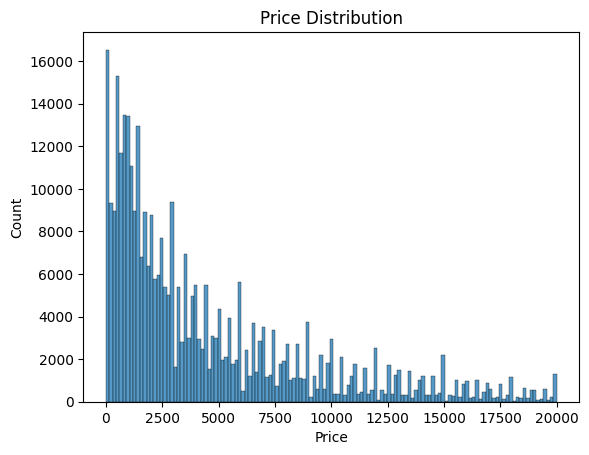

In [132]:
sns.histplot(data=cars['Price']).set_title('Price Distribution')

In [133]:
price = cars[cars['Price']<100]
price

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired
7,0,sedan,1980,manual,50,other,40000,petrol,volkswagen,no
40,0,tbd,1990,tbd,0,corsa,150000,petrol,opel,tbd
59,1,suv,1994,manual,286,tbd,150000,tbd,sonstige_autos,tbd
89,1,sedan,1995,manual,113,e_klasse,150000,gasoline,mercedes_benz,no
111,0,tbd,2017,manual,0,golf,5000,petrol,volkswagen,tbd
...,...,...,...,...,...,...,...,...,...,...
354238,0,small,2002,manual,60,fiesta,150000,petrol,ford,tbd
354248,0,small,1999,manual,53,swift,150000,petrol,suzuki,tbd
354277,0,small,1999,manual,37,arosa,150000,petrol,seat,yes
354309,99,small,1999,manual,60,arosa,150000,petrol,seat,yes


Text(0.5, 1.0, 'Power Distribution (All Cars)')

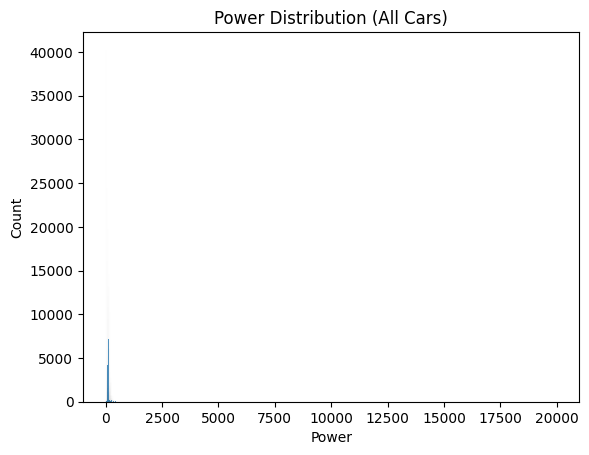

In [134]:
fig, ax = plt.subplots()
sns.histplot(data=cars['Power']).set_title('Power Distribution (All Cars)')

(0.0, 200.0)

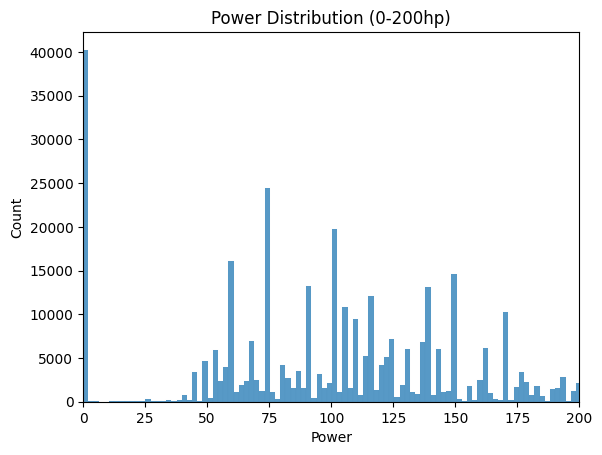

In [135]:
fig, ax = plt.subplots()
sns.histplot(data=cars['Power']).set_title('Power Distribution (0-200hp)')
ax.set_xlim(0, 200)

In [136]:
horsepower = cars[cars['Power']>1000]
horsepower

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired
1816,3200,small,2004,manual,1398,corolla,5000,petrol,toyota,no
2102,0,sedan,1999,tbd,1799,vectra,150000,petrol,opel,yes
5328,500,wagon,1999,manual,1001,astra,150000,petrol,opel,tbd
7661,1499,small,1999,manual,7515,lupo,150000,petrol,volkswagen,tbd
7720,1500,small,2000,manual,1400,tbd,150000,petrol,honda,tbd
...,...,...,...,...,...,...,...,...,...,...
348883,7500,sedan,2011,manual,1548,scenic,90000,petrol,renault,tbd
348968,250,small,1999,manual,1241,ypsilon,150000,petrol,lancia,yes
351947,1500,bus,2001,manual,1001,zafira,5000,gasoline,opel,no
353493,12500,tbd,2017,manual,2000,other,60000,gasoline,chrysler,no


Text(0.5, 1.0, 'Registration Year Distribution')

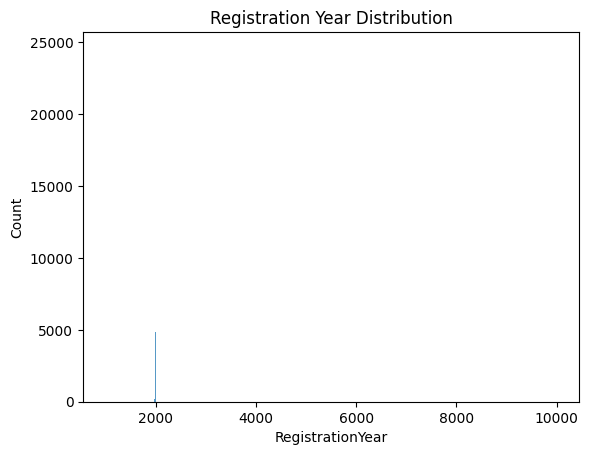

In [137]:
sns.histplot(data=cars['RegistrationYear']).set_title('Registration Year Distribution')

In [138]:
registration = cars[cars['RegistrationYear']<1980]
registration

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired
15,450,small,1910,tbd,0,ka,5000,petrol,ford,tbd
360,10000,bus,1976,tbd,0,transporter,5000,petrol,volkswagen,tbd
534,4900,convertible,1973,manual,44,kaefer,90000,petrol,volkswagen,no
622,0,tbd,1111,tbd,0,tbd,5000,tbd,opel,tbd
630,12000,sedan,1969,manual,140,s_klasse,80000,petrol,mercedes_benz,no
...,...,...,...,...,...,...,...,...,...,...
353961,200,tbd,1910,tbd,0,tbd,5000,petrol,sonstige_autos,tbd
354037,10500,convertible,1968,manual,54,other,20000,tbd,renault,no
354063,0,tbd,1970,tbd,0,sl,150000,tbd,mercedes_benz,tbd
354286,16500,coupe,1973,manual,200,other,150000,petrol,bmw,yes


In [139]:
cars2 = cars.loc[(cars['Price']>100) & 
                  (cars['Power']<1000) & 
                  (cars['RegistrationYear']>1980)]

In [140]:
cars2

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired
0,480,tbd,1993,manual,0,golf,150000,petrol,volkswagen,tbd
1,18300,coupe,2011,manual,190,tbd,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,tbd
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
...,...,...,...,...,...,...,...,...,...,...
354363,1150,bus,2000,manual,0,zafira,150000,petrol,opel,no
354365,2200,tbd,2005,tbd,0,tbd,20000,tbd,sonstige_autos,tbd
354366,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no
354367,9200,bus,1996,manual,102,transporter,150000,gasoline,volkswagen,no


* For this portion of the data cleanup, the following criteria were filtered out of the dataset:
    * Price of less than 100 Euro
    * Power of 1000 horsepower or less
    * Cars registered on or after 1980
    

In [141]:
cars2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336238 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             336238 non-null  int64 
 1   VehicleType       336238 non-null  object
 2   RegistrationYear  336238 non-null  int64 
 3   Gearbox           336238 non-null  object
 4   Power             336238 non-null  int64 
 5   Model             336238 non-null  object
 6   Mileage           336238 non-null  int64 
 7   FuelType          336238 non-null  object
 8   Brand             336238 non-null  object
 9   NotRepaired       336238 non-null  object
dtypes: int64(4), object(6)
memory usage: 28.2+ MB


In [142]:
cars2['Model'].value_counts()

Model
golf                  27921
other                 21913
3er                   19020
tbd                   16052
polo                  12392
                      ...  
kalina                    9
i3                        8
rangerover                4
range_rover_evoque        2
serie_2                   2
Name: count, Length: 249, dtype: int64

In [143]:
cars2 = cars2.drop('Model', axis=1)
cars2

,Price,VehicleType,RegistrationYear,Gearbox,Power,Mileage,FuelType,Brand,NotRepaired
0,480,tbd,1993,manual,0,150000,petrol,volkswagen,tbd
1,18300,coupe,2011,manual,190,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,125000,gasoline,jeep,tbd
3,1500,small,2001,manual,75,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,90000,gasoline,skoda,no
...,...,...,...,...,...,...,...,...,...
354363,1150,bus,2000,manual,0,150000,petrol,opel,no
354365,2200,tbd,2005,tbd,0,20000,tbd,sonstige_autos,tbd
354366,1199,convertible,2000,auto,101,125000,petrol,smart,no
354367,9200,bus,1996,manual,102,150000,gasoline,volkswagen,no


## Model training

##### Split Data

In [144]:
train, test_validate = train_test_split(cars2, test_size=0.4, random_state=12345)

In [145]:
print(train.shape)
print(test_validate.shape)

(201742, 9)
(134496, 9)


In [146]:
test, validate = train_test_split(test_validate, test_size=0.5, random_state=12345)

In [147]:
features_train = train.drop('Price', axis=1)
target_train = train['Price']

In [148]:
features_val = validate.drop('Price', axis=1)
target_val = validate['Price']

In [149]:
features_test = test.drop('Price', axis=1)
target_test = test['Price']

In [150]:
print(features_train.shape)
print(features_val.shape)
print(features_test.shape)
print(target_train.shape)
print(target_val.shape)
print(target_test.shape)

(201742, 8)
(67248, 8)
(67248, 8)
(201742,)
(67248,)
(67248,)


##### One Hot Encoding employed to categorical values:

* VehicleTypes
* Gearbox           
* Model             
* FuelType          
* Brand             

In [151]:
# cars_ohe = pd.get_dummies(cars3, drop_first=True, dtype=int)
# cars_ohe

features_train_ohe = pd.get_dummies(features_train, drop_first=True, dtype=int)
features_train_ohe

,RegistrationYear,Power,Mileage,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,VehicleType_tbd,...,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,NotRepaired_tbd,NotRepaired_yes
1693,2011,68,40000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
343771,2005,105,150000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
268700,2003,131,150000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
293511,2001,101,100000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236269,2001,75,150000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167447,2009,170,80000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50397,2008,140,150000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
91016,1996,0,150000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81394,2012,65,30000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
features_val_ohe = pd.get_dummies(features_val, drop_first=True, dtype=int)
features_val_ohe

,RegistrationYear,Power,Mileage,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,VehicleType_tbd,...,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,NotRepaired_tbd,NotRepaired_yes
83435,2010,0,150000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4774,2017,75,90000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
51908,1996,75,150000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
162195,1996,45,150000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
171583,1994,84,150000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127730,2000,224,150000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
304289,2010,84,30000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
238286,1992,115,150000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
162173,1999,50,150000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


##### Decision Tree Analysis

In [153]:
d_tree_results = []

for depth in range(1, 25):
    dt_start = time.time()
    d_tree = DecisionTreeRegressor(random_state = 12345, max_depth=depth)
    d_tree.fit(features_train_ohe, target_train)
    predicted_d_tree = d_tree.predict(features_val_ohe)
    d_tree_rsme = mean_squared_error(target_val, predicted_d_tree)**0.5
    dt_stop = time.time()
    dt_duration = dt_stop - dt_start
    d_tree_results.append({
        'Depth':depth,
        'RSME': d_tree_rsme,
        'Time': dt_duration
    })

In [154]:
d_tree_results_df = pd.DataFrame(d_tree_results)
d_tree_results_df.sort_values(by='RSME', ascending=True)

,Depth,RSME,Time
15,16,1883.865466,0.813817
14,15,1890.021139,0.782369
13,14,1895.623047,0.668699
16,17,1896.329470,1.142547
17,18,1903.809057,0.833501
12,13,1904.145335,0.682840
18,19,1909.251691,1.207273
19,20,1921.474782,0.864975
11,12,1931.002907,0.588471
21,22,1934.368730,0.931946


##### Random Forest Analysis

In [155]:
rf_results = []

for estimators in range(1, 25):
    rf_start = time.time()
    random_forest = RandomForestRegressor(random_state = 12345, n_estimators=estimators)
    random_forest.fit(features_train_ohe, target_train)
    predicted_rf = random_forest.predict(features_val_ohe)
    rf_rsme = mean_squared_error(target_val, predicted_rf)**0.5
    rf_stop = time.time()
    rf_duration = rf_stop - rf_start
    rf_results.append({
        'Estimators':estimators,
        'RSME': rf_rsme,
        'Time': rf_duration
    })

In [156]:
rf_results_df = pd.DataFrame(rf_results)
rf_results_df.sort_values(by='RSME', ascending=True)

,Estimators,RSME,Time
23,24,1673.172726,15.533935
22,23,1674.360337,16.175037
21,22,1675.894777,14.544405
20,21,1676.434366,13.771218
19,20,1677.585435,13.358461
18,19,1678.500434,12.357148
17,18,1680.072401,11.843302
16,17,1682.254103,11.238453
15,16,1684.337779,10.657383
14,15,1687.600174,10.216042


##### Linear Regression

In [157]:
%%time

linear_reg = LinearRegression()
linear_reg.fit(features_train_ohe, target_train)

lr_predictions = linear_reg.predict(features_val_ohe)
lr_rsme = mean_squared_error(target_val, lr_predictions)**0.5

print('Linear Regression RSME: ', lr_rsme)

Linear Regression RSME:  3033.0645736284937
CPU times: user 1.94 s, sys: 176 ms, total: 2.12 s
Wall time: 493 ms


## Model analysis
* Now that models have been checked, its time to see how gradient boosting impacts the data

##### CatBoost

In [158]:
cars2.columns

Index(['Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 'Power',
       'Mileage', 'FuelType', 'Brand', 'NotRepaired'],
      dtype='object')

In [159]:
%%time

cb_features = ['VehicleType', 'Gearbox', 'FuelType', 'Brand', 'NotRepaired']

cb_model = CatBoostRegressor(iterations=150, random_seed=12345, cat_features=cb_features)
cb_model.fit(features_train, target_train, verbose=10)

cb_predict = cb_model.predict(features_val)
cb_rsme = mean_squared_error(target_val, cb_predict)**0.5

print('CatBoost RSME: ', cb_rsme)

Learning rate set to 0.442767
0:	learn: 3380.0235676	total: 21.4ms	remaining: 3.19s
10:	learn: 1941.7437248	total: 187ms	remaining: 2.36s
20:	learn: 1851.7209599	total: 346ms	remaining: 2.13s
30:	learn: 1801.4772502	total: 485ms	remaining: 1.86s
40:	learn: 1772.2781864	total: 643ms	remaining: 1.71s
50:	learn: 1753.4835221	total: 846ms	remaining: 1.64s
60:	learn: 1738.3129802	total: 1.22s	remaining: 1.78s
70:	learn: 1720.9929173	total: 1.4s	remaining: 1.56s
80:	learn: 1710.2538823	total: 1.58s	remaining: 1.35s
90:	learn: 1698.4775847	total: 1.78s	remaining: 1.16s
100:	learn: 1690.4729690	total: 1.96s	remaining: 953ms
110:	learn: 1681.8407447	total: 2.22s	remaining: 780ms
120:	learn: 1674.3817602	total: 2.38s	remaining: 570ms
130:	learn: 1668.2063203	total: 2.52s	remaining: 366ms
140:	learn: 1659.1093051	total: 2.71s	remaining: 173ms
149:	learn: 1653.2144449	total: 2.86s	remaining: 0us
CatBoost RSME:  1693.2843765458383
CPU times: user 11.9 s, sys: 1.33 s, total: 13.2 s
Wall time: 3.2 s


##### LightGBM 

In [160]:
%%time

lgbm_results = []

for depth in range(1, 25):
    lgbm_start = time.time()
    lgbm_model = LGBMRegressor(max_depth=depth, random_seed=12345)
    lgbm_model.fit(features_train_ohe, target_train)
    lgbm_predict = lgbm_model.predict(features_val_ohe)
    lgbm_rsme = mean_squared_error(target_val, lgbm_predict)**0.5
    lgbm_stop = time.time()
    lgbm_duration = lgbm_stop - lgbm_start
    lgbm_results.append({
        'Depth':depth,
        'RSME': lgbm_rsme,
        'Time': lgbm_duration
    })

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 422
[LightGBM] [Info] Number of data points in the train set: 201742, number of used features: 61
[LightGBM] [Info] Start training from score 4593.325168
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [161]:
lgbm_results_df = pd.DataFrame(lgbm_results)
lgbm_results_df.sort_values(by='RSME', ascending=True)

,Depth,RSME,Time
17,18,1723.682374,1.039359
13,14,1724.037006,0.998905
16,17,1725.307597,1.045313
14,15,1725.413888,1.016195
23,24,1725.891932,1.094897
21,22,1725.891932,1.070380
20,21,1725.891932,0.989488
19,20,1725.891932,1.012961
18,19,1725.891932,0.999337
22,23,1725.891932,1.293149


##### XGBoost

In [162]:
xg_results = []

for depth in range(1, 25):
    xg_start = time.time()
    xg_model = XGBRegressor(max_depth=depth, random_state=12345)
    xg_model.fit(features_train_ohe, target_train)
    xg_predict = xg_model.predict(features_val_ohe)
    xg_rsme = mean_squared_error(target_val, xg_predict)**0.5
    xg_stop = time.time()
    xg_duration = xg_stop - xg_start
    xg_results.append({
        'Depth':depth,
        'RSME': xg_rsme,
        'Time': xg_duration
    })

In [163]:
xg_results_df = pd.DataFrame(xg_results)
xg_results_df.sort_values(by='RSME', ascending=True)

,Depth,RSME,Time
9,10,1612.378057,1.115354
8,9,1615.200529,0.809554
10,11,1622.884931,1.045580
7,8,1624.519775,0.761887
11,12,1628.899629,1.167044
12,13,1639.678246,1.381247
6,7,1642.917451,0.675141
13,14,1651.781992,1.660859
14,15,1670.794571,1.882677
5,6,1676.217766,0.706918


##### Testing the Best Model

In [164]:
#Use OHE on test features dataset

features_test_ohe = pd.get_dummies(features_test, drop_first=True, dtype=int)

In [165]:
xg_results2 = []

for depth in range(1, 25):
    xg_start2 = time.time()
    xg_model2 = XGBRegressor(max_depth=depth, random_state=12345)
    xg_model2.fit(features_test_ohe, target_test)
    xg_predict2 = xg_model2.predict(features_val_ohe)
    xg_rsme2 = mean_squared_error(target_val, xg_predict2)**0.5
    xg_stop2 = time.time()
    xg_duration = xg_stop2 - xg_start2
    xg_results2.append({
        'Depth':depth,
        'RSME': xg_rsme2,
        'Time': xg_duration
    })

In [166]:
xg_results2

[{'Depth': 1, 'RSME': 2245.5728667758704, 'Time': 0.24715971946716309},
 {'Depth': 2, 'RSME': 1946.8417372760427, 'Time': 0.20059490203857422},
 {'Depth': 3, 'RSME': 1833.5190208994288, 'Time': 0.2891201972961426},
 {'Depth': 4, 'RSME': 1776.5371513143202, 'Time': 0.2814209461212158},
 {'Depth': 5, 'RSME': 1736.0344178615815, 'Time': 0.3474600315093994},
 {'Depth': 6, 'RSME': 1708.2319075582213, 'Time': 0.40408921241760254},
 {'Depth': 7, 'RSME': 1685.365909824926, 'Time': 0.46297216415405273},
 {'Depth': 8, 'RSME': 1679.2894330638778, 'Time': 0.5671586990356445},
 {'Depth': 9, 'RSME': 1687.896916283693, 'Time': 0.6131141185760498},
 {'Depth': 10, 'RSME': 1699.003237195268, 'Time': 0.6089029312133789},
 {'Depth': 11, 'RSME': 1715.0762373725547, 'Time': 0.7172317504882812},
 {'Depth': 12, 'RSME': 1729.7306148646385, 'Time': 0.7877719402313232},
 {'Depth': 13, 'RSME': 1744.2259744654648, 'Time': 1.0011398792266846},
 {'Depth': 14, 'RSME': 1767.5108910555543, 'Time': 1.175873041152954},
 

In [167]:
xg_results_df2 = pd.DataFrame(xg_results2)
xg_results_df2.sort_values(by='RSME', ascending=True)

,Depth,RSME,Time
7,8,1679.289433,0.567159
6,7,1685.365910,0.462972
8,9,1687.896916,0.613114
9,10,1699.003237,0.608903
5,6,1708.231908,0.404089
10,11,1715.076237,0.717232
11,12,1729.730615,0.787772
4,5,1736.034418,0.347460
12,13,1744.225974,1.001140
13,14,1767.510891,1.175873


#### Conclusion
* The RSME Results are as follows:
    * Decision Tree
        * RSME: 1883.865466
        * Time: 0.813817 s
        * Depth: 16
    * Random Forest
        * RSME: 1673.172726
        * Time: 15.533935 s
        * Estimators: 24
    * Linear Regression
        * RSME: 3033.0645736284937
        * Time: 496 ms
    * CatBoost Regressor
        * RSME: 1693.2843765458383
        * Time: 2.53 s
    * Light GBM Regressor
        * RSME: 1723.682374
        * Time: 1.039359 s
        * Depth: 18
    * XGBoost Regressor
        * RSME: 1612.378057
        * Time: 1.115354
        * Depth: 10

* Results on the test dataset using XGBoost Regressor:
    * RSME: 1679.289433
    * Time: 0.567159 s
    * Depth: 8

* XGBoost yielded the best RSME value, followed by Random Forest and CatBoost respectively
* Although XGBoost was the best RSME Value, CatBoost had a quicker processing time
* The Random Forest Regressor had the 2nd best RSME Value, but processing values takes significantly longer versus any gradient boosted methods
* Based on these results Rusty Bargain should either select XGBoost or CatBoost for their methodologies
    * XGBoost yields a better RSME Value, but takes around 0.7 seconds longer to process
    * CatBoost is quicker, but has a higher RSME value
* Comparing against the test dataset, the RSME value was higher by 66.911376
    * The differences between the training and test data set can possible attributed to differences in the size of the datsets, as well as quality of the data
        * With respect to data quality, many values were missing and replaced by a "tbd" value